In [19]:
# load apple data from pickle file
# if pickle is not imported, then import it
if not 'pickle' in globals():
    import pickle
# load the pickle file
apple_bars_df = pickle.load(open("data/apple_bar_data.pkl", "rb"))

In [20]:
#show the head of the dataframe
apple_bars_df.head()
apple_bars_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365786 entries, 2020-10-01 08:00:00+00:00 to 2022-06-30 23:59:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   open         365786 non-null  float64
 1   high         365786 non-null  float64
 2   low          365786 non-null  float64
 3   close        365786 non-null  float64
 4   volume       365786 non-null  int64  
 5   trade_count  365786 non-null  int64  
 6   vwap         365786 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 22.3 MB


Text(0.5, 0, 'Date')

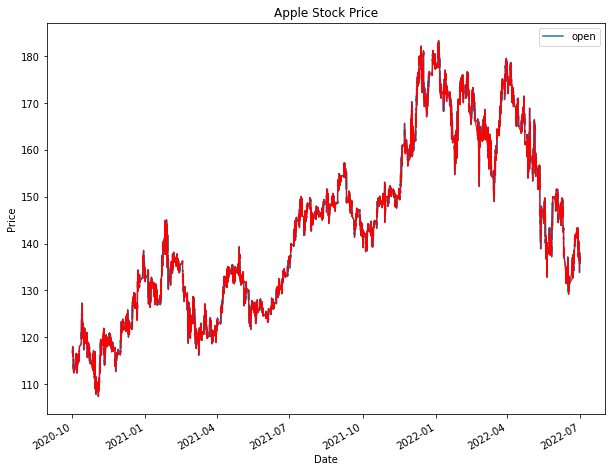

In [22]:
if not 'matplotlib' in globals():
    import matplotlib.pyplot as plt
# adjust figure size
plt.rcParams['figure.figsize'] = (10, 8)
# show a plot of the data
plot = apple_bars_df.plot(use_index=True, y='open' )
plot.add_line(plt.Line2D(apple_bars_df.index, apple_bars_df.close, color='red', linewidth=1, label='close'))
# title the axes
plot.set_title('Apple Stock Price')
plot.set_ylabel('Price')
plot.set_xlabel('Date')

In [23]:
apple_bars_df.corr()

,open,high,low,close,volume,trade_count,vwap
open,1.000000,0.999986,0.999986,0.999986,-0.011165,0.013334,0.999976
high,0.999986,1.000000,0.999970,0.999986,-0.010102,0.015398,0.999974
low,0.999986,0.999970,1.000000,0.999987,-0.012199,0.011117,0.999974
close,0.999986,0.999986,0.999987,1.000000,-0.011122,0.013255,0.999978
volume,-0.011165,-0.010102,-0.012199,-0.011122,1.000000,0.398194,-0.011147
trade_count,0.013334,0.015398,0.011117,0.013255,0.398194,1.000000,0.013294
vwap,0.999976,0.999974,0.999974,0.999978,-0.011147,0.013294,1.000000


<AxesSubplot:>

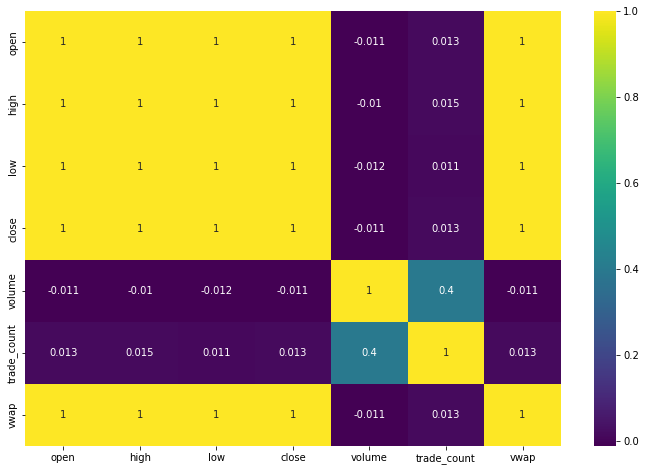

In [24]:
#import seaborn as sns if not imported
if not 'sns' in globals():
    import seaborn as sns
# create a heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(apple_bars_df.corr(), annot=True, cmap='viridis')


In [25]:
#convert the dataframe index to a column
apple_bars_df['DateTime'] = apple_bars_df.index.to_pydatetime()
# remove the index from the dataframe
apple_bars_df = apple_bars_df.reset_index(drop=True)
# show the head of the dataframe
#apple_bars_df.head()

In [26]:
#%%script false
#drop all columns except for the DateTime and the vwap columns
apple_bars_df = apple_bars_df.drop(columns=['open', 'high', 'low', 'close', 'volume','trade_count'])
# show the head of the dataframe
#apple_bars_df.head()

In [27]:
#%%script false
# create a new dataframe with a column called 'Date' that contains the date of the data and colums for every DateTime with the corresponding vwap value

#create an array of all the unique dates in the dataframe
dates = apple_bars_df['DateTime'].dt.date.unique()
# make dates to list
dates = dates.tolist()
dates = list(map(lambda x: x.strftime('%Y-%m-%d'), dates))
#dates


In [28]:
#%%script false
# import pandas as pd if not imported
if not 'pd' in globals():
    import pandas as pd
    
# in a new dataframe, for each date in the array, create a columns for every vwap value for that date
apple_df = pd.DataFrame(index=dates, columns=range(0, 1000))

# get all vwap values for each date
for date in dates:
    # get the vwap values for that date
    vwap = apple_bars_df[apple_bars_df['DateTime'].dt.strftime('%Y-%m-%d') == date]['vwap'].tolist()
    # fill vwap list with zeros to match the length of the columns
    vwap = vwap + [0] * (1000 - len(vwap))
    # create a column for that date
    apple_df.loc[date] = vwap

In [31]:
#%%script false
apple_df.head()


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2020-10-01,116.759684,116.865102,116.747758,116.907923,116.917398,116.926508,116.879636,116.849084,116.933841,116.986359,...,0,0,0,0,0,0,0,0,0,0
2020-10-02,114.420705,114.002524,113.957528,114.199016,114.075094,114.074191,114.013048,113.965624,113.867487,113.840436,...,0,0,0,0,0,0,0,0,0,0
2020-10-05,113.606819,113.845019,113.947424,113.986217,113.990121,113.980281,113.997397,113.99652,113.931006,113.869103,...,0,0,0,0,0,0,0,0,0,0
2020-10-06,115.692454,115.661832,115.70362,115.530299,115.520549,115.404157,115.475271,115.503017,115.498355,115.48536,...,0,0,0,0,0,0,0,0,0,0
2020-10-07,114.123185,114.007679,114.025018,114.071744,114.171349,114.3112,114.343258,114.22003,114.206488,114.219018,...,0,0,0,0,0,0,0,0,0,0


In [30]:
%%script false
# some tests
apple_bars_df[apple_bars_df['DateTime'].dt.date==dates[0]]['DateTime'].dt.minute.unique()
apple_bars_df['DateTime'].dt.date.unique()[0].strftime('%Y-%m-%d')

CalledProcessError: Command 'b"# some tests\napple_bars_df[apple_bars_df['DateTime'].dt.date==dates[0]]['DateTime'].dt.minute.unique()\napple_bars_df['DateTime'].dt.date.unique()[0].strftime('%Y-%m-%d')\n"' returned non-zero exit status 1.

In [32]:
#save the dataframe to a pickle file
apple_df.to_pickle('data/apple_df.pkl')

In [33]:
#load the pickle file
apple_df = pd.read_pickle('data/apple_df.pkl')

In [34]:
#import numpy as np if not imported
if not 'np' in globals():
    import numpy as np
# set 'gain' column to 1 if column '0' is less than the last non-zero column in the row
apple_df['gain'] = apple_df.apply(lambda x: True if x[0] < x[x[x>0].last_valid_index()] else False, axis=1)

#print the head of the dataframe showing the index and the gain column as well as column 0 and the last non-zero column
print(apple_df.head(50)['gain'])

2020-10-01     True
2020-10-02    False
2020-10-05     True
2020-10-06    False
2020-10-07     True
2020-10-08    False
2020-10-09     True
2020-10-12     True
2020-10-13    False
2020-10-14    False
2020-10-15     True
2020-10-16    False
2020-10-19    False
2020-10-20     True
2020-10-21    False
2020-10-22    False
2020-10-23    False
2020-10-26     True
2020-10-27     True
2020-10-28    False
2020-10-29    False
2020-10-30    False
2020-11-02    False
2020-11-03     True
2020-11-04     True
2020-11-05     True
2020-11-06    False
2020-11-07     True
2020-11-09    False
2020-11-10    False
2020-11-11     True
2020-11-12    False
2020-11-13     True
2020-11-14    False
2020-11-16     True
2020-11-17    False
2020-11-18    False
2020-11-19     True
2020-11-20    False
2020-11-21     True
2020-11-23    False
2020-11-24     True
2020-11-25     True
2020-11-26    False
2020-11-27    False
2020-11-30     True
2020-12-01     True
2020-12-02     True
2020-12-03    False
2020-12-04    False


In [35]:
# pickle the dataframe
apple_df.to_pickle('data/apple_df_ML.pkl')

In [36]:
#imports
import pickle
import pandas as pd
import numpy as np


In [37]:
#load apple_df_ML.pkl
apple_df_ML = pickle.load(open('data/apple_df_ML.pkl', 'rb'))


In [38]:
#drop index column
apple_df_ML.reset_index(drop=True, inplace=True)
apple_df_ML

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,gain
0,116.759684,116.865102,116.747758,116.907923,116.917398,116.926508,116.879636,116.849084,116.933841,116.986359,...,0,0,0,0,0,0,0,0,0,True
1,114.420705,114.002524,113.957528,114.199016,114.075094,114.074191,114.013048,113.965624,113.867487,113.840436,...,0,0,0,0,0,0,0,0,0,False
2,113.606819,113.845019,113.947424,113.986217,113.990121,113.980281,113.997397,113.99652,113.931006,113.869103,...,0,0,0,0,0,0,0,0,0,True
3,115.692454,115.661832,115.70362,115.530299,115.520549,115.404157,115.475271,115.503017,115.498355,115.48536,...,0,0,0,0,0,0,0,0,0,False
4,114.123185,114.007679,114.025018,114.071744,114.171349,114.3112,114.343258,114.22003,114.206488,114.219018,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,139.472937,139.666417,139.822981,139.750764,139.745796,139.693825,139.692225,139.734483,139.741705,139.668516,...,0,0,0,0,0,0,0,0,0,True
472,142.520165,142.862411,142.804697,142.754925,142.721403,142.798687,142.818407,142.80695,142.788154,142.738086,...,0,0,0,0,0,0,0,0,0,False
473,141.985858,142.114042,142.227377,142.180016,142.287812,142.215152,142.150874,142.102659,142.190929,142.238726,...,0,0,0,0,0,0,0,0,0,False
474,137.599456,137.384981,137.338305,137.509447,137.611533,137.661783,137.519065,137.529016,137.489386,137.530165,...,0,0,0,0,0,0,0,0,0,True


In [39]:
# function drops any rows with more than 40% 0 values
def drop_rows_with_many_zeros(df):
    counts =(df==0).astype(int).sum(axis=1)
    df = df[counts < len(df.columns)*0.4]
    return df

# function that replaces any nan values with the last non-nan value
def replace_nan_with_last_non_nan(df):
    for row_indx in range(len(df)):
        last_non_nan_value = df.iloc[row_indx,0]
        for col_indx, val in enumerate(df.iloc[row_indx,:]):
            if not pd.notna(val):
                df.iloc[row_indx,col_indx] = last_non_nan_value
            else:
                last_non_nan_value = val
    return df

In [40]:
#only keep values that are not equal to 0 except for the 'gain' column
nan_value = float('NaN')

#replace all 0s with NaN
apple_df_ML.replace(0, nan_value, inplace=True)

#drop rows with more than 40% 0 values
apple_df_ML = drop_rows_with_many_zeros(apple_df_ML)

#replace nan values with the last non-nan value
apple_df_ML = replace_nan_with_last_non_nan(apple_df_ML)


# for the 'gain' column, replace all True with 1 and all False with 0
apple_df_ML.replace(True, 1, inplace=True)
apple_df_ML.replace(False, 0, inplace=True)

# remove all columns between 360 and 999
apple_df_ML.drop(apple_df_ML.columns[360:1000], axis=1, inplace=True)

In [41]:
# save the dataframe to a pickle file
apple_df_ML.to_pickle('data/apple_df_ML.pkl')